# KMeans

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
bigv = pd.read_csv("./data/data.csv")
bigv

,EXT,EST,AGR,CSN,OPN
0,4.6,2.4,3.5,3.0,4.5
1,2.0,2.5,4.2,3.7,3.5
2,2.5,2.6,4.0,3.2,4.1
3,2.6,2.9,3.6,2.5,3.9
4,2.9,1.9,4.2,4.4,4.8
...,...,...,...,...,...
1015336,3.4,3.3,3.6,2.9,3.3
1015337,3.2,4.4,3.7,2.8,4.5
1015338,3.9,2.9,3.1,2.1,4.8
1015339,2.2,3.5,3.7,3.6,4.1


# Clustering

The k-means algorithm chose k points in the learning space, chosen tobe the center of each cluster; starting from one point, we select the nearest points and add them to the cluster.
When all the points are in a group, we compute the centers of mass of each cluster (i.e. the average value), and restart the process.
The process stops when the maximal number of iterations is reached or when no group changes between two launches.

In [5]:
kme = KMeans(n_clusters=5)
# n_clusters represents the number of groups we want to form

We apply k-means to the data

In [6]:
kme.fit(bigv)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

At the end, we attribute a group number to each line

In [7]:
kme.labels_

array([2, 4, 4, ..., 1, 0, 1], dtype=int32)

In [11]:
kme.labels_[0]

2

As an example, the first line is in the third group (id=2)

But unlike supervised learning, your job is not done yet...

You have to describe your groups!

To plot the results, I will project the data (from a 5 dimensions space) in two dimensions.

To do that, I'll use a PCA (principal component analysis). But it's not mandatory to do so, you can plot each pair of variables and draw the same conclusions!

FYI it's another way to reduce your learning space, but after the PCA, it will be harder to interpret the feature importance.

In [19]:
pca = PCA(n_components=2)
pca.fit(bigv)
res_pca = pca.transform(bigv)
res_pca

array([[-1.68193929, -0.49678282],
       [ 0.30312097,  0.94961915],
       [-0.01223349,  0.47148575],
       ...,
       [-0.70980803, -0.60467532],
       [ 0.74043692,  0.06692537],
       [-0.88241996, -0.66733131]])

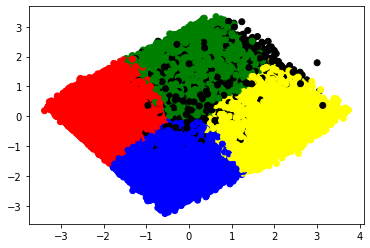

In [21]:
colors = ['yellow', 'blue', 'red', 'black', 'green']

plt.scatter([res_pca[i][0] for i in range(len(res_pca))],
            [res_pca[i][1] for i in range(len(res_pca))],
            color = [colors[i] for i in kme.labels_])
plt.xlabel()
plt.show()

Looks like an OS, right?

Now, we want to describe each dimension (the x and the y).

To describe the x, let's study the red group (id=2) and the yellow group (id=0).

To describe the y, let's study the blue group (id=1) and the green and black groups (ids=3,4)

In [22]:
bigv['groups'] = kme.labels_

#### Group description

In [31]:
bigv.groupby("groups").mean()

,EXT,EST,AGR,CSN,OPN
groups,,,,,
0,2.038741,3.924722,3.484178,3.098847,3.810939
1,3.619752,3.660152,3.764748,3.122909,4.093468
2,3.906132,2.188325,3.833259,3.490274,4.123190
3,2.925016,2.856951,3.348640,3.020764,3.023415
4,2.312565,2.453317,3.460064,3.474348,4.097027


- Group 0 have low score in extraversion (2.03, the lowest of all groups), they are mostly introverts. But they have a high neuroticism score (3.92), they are sensitive, and may lack of confidence, even if they are opened to new challenges. See INFP in other personalities classifications, the empathic profile.

- Group 2 members have the opposite personality profile. They are opened to new experiences and challenges (score OPN : 4.12), and say it out loud (EXT:3.96), without being scared (EST:2.18). They also have the highest agreableness score. It's a group with warm and explosive personalities ;)

X is a gradient of extraversion; the bigger x values you have, the more extravert you are in life!

- Group 1 and 3 are in the middle; group 1 is similar to group 2 in term of extraversion, but is way more sensitive in general. Group 3 and 4 are more introverts, but less sensitive.

So what's this y dimension? I think that the biggest difference between 1 and 3 is the openess to new challenges. Group 3 members could be a bit afraid of new experiences, compared to group 1.
Group 4 is difficult to interpret, that's the sign we should have chosen 4 groups?